In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#don't do this, but it means the thing above: 
#from matplotlib import pyplot as plt

In [3]:
df = pd.read_excel("richpeople.xlsx")

In [4]:
recent = df[df['year'] == 2014]
recent = recent[['name','age','gender','selfmade','networthusbillion','countrycode','rank']]
recent = recent.sort_values(by='rank').head(8)
recent

,name,age,gender,selfmade,networthusbillion,countrycode,rank
284,Bill Gates,58.0,male,self-made,76.0,USA,1
348,Carlos Slim Helu,74.0,male,self-made,72.0,MEX,2
124,Amancio Ortega,77.0,male,self-made,64.0,ESP,3
2491,Warren Buffett,83.0,male,self-made,58.2,USA,4
1377,Larry Ellison,69.0,male,self-made,48.0,USA,5
509,David Koch,73.0,male,inherited,40.0,USA,6
381,Charles Koch,78.0,male,inherited,40.0,USA,6
2185,Sheldon Adelson,80.0,male,self-made,38.0,USA,8


In [5]:
americans = recent[recent['countrycode'] == 'USA']
americans

,name,age,gender,selfmade,networthusbillion,countrycode,rank
284,Bill Gates,58.0,male,self-made,76.0,USA,1
2491,Warren Buffett,83.0,male,self-made,58.2,USA,4
1377,Larry Ellison,69.0,male,self-made,48.0,USA,5
509,David Koch,73.0,male,inherited,40.0,USA,6
381,Charles Koch,78.0,male,inherited,40.0,USA,6
2185,Sheldon Adelson,80.0,male,self-made,38.0,USA,8


# Value counts vs groupby
groupby() whenever you want aggregate data - if you want totals of categories, or you want medians, ro you want to know the 75% percentile or the average or stuff
values_counts() is for just if you want a count of the number in each category

In [8]:
recent['countrycode'].value_counts()

USA    6
ESP    1
MEX    1
Name: countrycode, dtype: int64

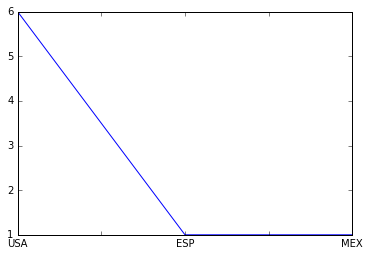

In [9]:
recent['countrycode'].value_counts().plot()

In [10]:
recent.groupby('countrycode')['networthusbillion'].sum()

countrycode
ESP     64.0
MEX     72.0
USA    300.2
Name: networthusbillion, dtype: float64

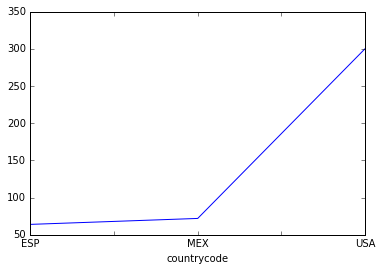

In [11]:
recent.groupby('countrycode')['networthusbillion'].sum().plot()

In [13]:
recent = df[df['year'] == 2014]
recent = recent[['name', 'countrycode', 'networthusbillion']]
recent.head()

,name,countrycode,networthusbillion
1,A. Jerrold Perenchio,USA,2.6
5,Abdulla Al Futtaim,ARE,2.5
6,Abdulla bin Ahmad Al Ghurair,ARE,4.8
8,Abdullah Al Rajhi,SAU,2.4
9,Abdulsamad Rabiu,NGA,1.2


In [14]:
country_gdp = [
   { 'country': 'USA', 'gdp': 17.418 },
   { 'country': 'DEU', 'gdp': 3.859 },
   { 'country': 'CHN', 'gdp': 10.380 },
   { 'country': 'RUS', 'gdp': 1.857 },
   { 'country': 'JPN', 'gdp': 4.616 },
   { 'country': 'BRA', 'gdp': 2.353 },
   { 'country': 'HKG', 'gdp': 0.289 },
   { 'country': 'FRA', 'gdp': 2.846 },
   { 'country': 'GBR', 'gdp': 2.945 },
   { 'country': 'IND', 'gdp': 2.049 }
]
country_gdp

[{'country': 'USA', 'gdp': 17.418},
 {'country': 'DEU', 'gdp': 3.859},
 {'country': 'CHN', 'gdp': 10.38},
 {'country': 'RUS', 'gdp': 1.857},
 {'country': 'JPN', 'gdp': 4.616},
 {'country': 'BRA', 'gdp': 2.353},
 {'country': 'HKG', 'gdp': 0.289},
 {'country': 'FRA', 'gdp': 2.846},
 {'country': 'GBR', 'gdp': 2.945},
 {'country': 'IND', 'gdp': 2.049}]

In [15]:
gdp_df = pd.DataFrame(country_gdp)
gdp_df.head(2)

,country,gdp
0,USA,17.418
1,DEU,3.859


In [16]:
gdp_df['billions'] = gdp_df['gdp'] * 1000
gdp_df.head()

,country,gdp,billions
0,USA,17.418,17418.0
1,DEU,3.859,3859.0
2,CHN,10.380,10380.0
3,RUS,1.857,1857.0
4,JPN,4.616,4616.0


In [17]:
recent.head(2)

,name,countrycode,networthusbillion
1,A. Jerrold Perenchio,USA,2.6
5,Abdulla Al Futtaim,ARE,2.5


In [18]:
gdp_df.head(2)

,country,gdp,billions
0,USA,17.418,17418.0
1,DEU,3.859,3859.0


In [19]:
#We are matchin up:
#countrycode from recent
#to
#country from gdp_df

In [22]:
merged = recent.merge(gdp_df, left_on="countrycode", right_on="country")
#on='country'
merged.head()

,name,countrycode,networthusbillion,country,gdp,billions
0,A. Jerrold Perenchio,USA,2.6,USA,17.418,17418.0
1,Abigail Johnson,USA,17.3,USA,17.418,17418.0
2,Aerin Lauder Zinterhofer,USA,1.1,USA,17.418,17418.0
3,Alan Gerry,USA,1.4,USA,17.418,17418.0
4,Alec Gores,USA,2.0,USA,17.418,17418.0


In [23]:
len(gdp_df)

10

In [24]:
recent['countrycode'].describe()

count     1653
unique      69
top        USA
freq       499
Name: countrycode, dtype: object

In [26]:
merged[merged['countrycode'] == 'SAU'].head()

,name,countrycode,networthusbillion,country,gdp,billions


In [27]:
len(recent)

1653

In [28]:
len(merged)

1130

In [29]:
#a left join!
#will allow you to have empty non-matching values
#so we'll have our saudis back
left_merged = recent.merge(gdp_df, how="left", left_on="countrycode", right_on="country")
# on='country'
left_merged.head()

,name,countrycode,networthusbillion,country,gdp,billions
0,A. Jerrold Perenchio,USA,2.6,USA,17.418,17418.0
1,Abdulla Al Futtaim,ARE,2.5,NaN,NaN,NaN
2,Abdulla bin Ahmad Al Ghurair,ARE,4.8,NaN,NaN,NaN
3,Abdullah Al Rajhi,SAU,2.4,NaN,NaN,NaN
4,Abdulsamad Rabiu,NGA,1.2,NaN,NaN,NaN


In [32]:
#left_merged['billion'] == 'NaN' does not work
left_merged['billions'].isnull()
#this will tell you if something is NaN or not
only_people_with_gdps = left_merged[left_merged['billions'].notnull()]
only_people_with_gdps.head()

,name,countrycode,networthusbillion,country,gdp,billions
0,A. Jerrold Perenchio,USA,2.6,USA,17.418,17418.0
5,Abigail Johnson,USA,17.3,USA,17.418,17418.0
6,Abilio dos Santos Diniz,BRA,2.8,BRA,2.353,2353.0
8,Adi Godrej,IND,3.5,IND,2.049,2049.0
9,Aerin Lauder Zinterhofer,USA,1.1,USA,17.418,17418.0


In [34]:
#JOIN blah on blah.id = blah2.blah_id

nba= pd.read_csv("NBA-Census-10.14.2013.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 14: unexpected end of data